# Convolutional nets

## Primary use case: computer vision

# Example: MNIST

In the previous MNIST, we did a Dense neural net, which achieved an accuracy of ~97%

We will now use a convnet to solve the problem and evalute its performance

## Import and prep the data

In [2]:
import keras
keras.__version__

from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Build the network

In [3]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Flatten the output and push into a Dense network for creating an output

In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Display the architecture of the network

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

## Comsummarye and fit

In [5]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 17s 19ms/step - loss: 0.1705 - accuracy: 0.9468
Epoch 2/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0459 - accuracy: 0.9855
Epoch 3/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0323 - accuracy: 0.9902
Epoch 4/5
938/938 [==============================] - 20s 22ms/step - loss: 0.0241 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0192 - accuracy: 0.9942


## Evaluate

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.0282 - accuracy: 0.9922


In [7]:
test_acc

0.9922000169754028

## Result

The original dense network had an accuracy of 97.8%. The convnet goes up to 99.22%. This is a 68% improvement in the error rate.

# Gradually improving network performance

In [2]:
import os, shutil

In [6]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = './data/dogs-vs-cats/train'

# The directory where we will
# store our smaller dataset
base_dir = './data/dogs-vs-cats-small'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

Count the data in the folder

In [7]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [8]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [9]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [10]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [11]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [12]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


## First try: normal architecture
### Build the network

In [13]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Compile the network

In [14]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

### Prepare the data

* Read the picture files
* Convert the JPEG files into grids of RGB values
* Convert to floating-point tensors
* Rescale the pixel values to [0, 1]

In [15]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Train the model

In [17]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 50s 497ms/step - loss: 0.6813 - acc: 0.5575 - val_loss: 0.6638 - val_acc: 0.5910
Epoch 2/30
100/100 [==============================] - 53s 529ms/step - loss: 0.6522 - acc: 0.6150 - val_loss: 0.6310 - val_acc: 0.6430
Epoch 3/30
100/100 [==============================] - 50s 500ms/step - loss: 0.6025 - acc: 0.6745 - val_loss: 0.6725 - val_acc: 0.5710
Epoch 4/30
100/100 [==============================] - 58s 579ms/step - loss: 0.5710 - acc: 0.7025 - val_loss: 0.6138 - val_acc: 0.6680
Epoch 5/30
100/100 [==============================] - 60s 604ms/step - loss: 0.5516 - acc: 0.7170 - val_loss: 0.5942 - val_acc: 0.6840
Epoch 6/30
100/100 [==============================] - 52s 515ms/step - loss: 0.5286 - acc: 0.7280 - val_loss: 0.5746 - val_acc: 0.7010
Epoch 7/30
100/100 [==============================] - 49s 494ms/step - loss: 0.5101 - acc: 0.7525 - val_loss: 0.5714 - val_acc: 0.6890
Epoch 8/30
100/100 [==============================] - 5

Save the model

In [18]:
model.save('cats_and_dogs_small_1.h5')

### Plot the model's performance

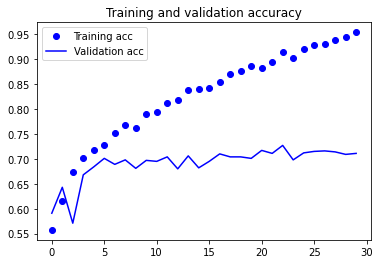

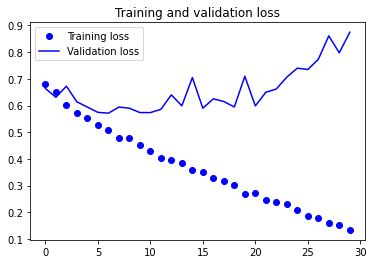

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Data augmentation

The model is clearly overfitting.

We will now use data augmentation to improve the performance of the model. This is a technique exclusive to computer vision problems.

We will use data transformations to create new training samples which are reliable.

In [20]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

### Add a dropout layer to the network

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

### Train the model

In [22]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 73s 733ms/step - loss: 0.6913 - acc: 0.5314 - val_loss: 0.6837 - val_acc: 0.5152
Epoch 2/100
100/100 [==============================] - 75s 745ms/step - loss: 0.6747 - acc: 0.5676 - val_loss: 0.6554 - val_acc: 0.6140
Epoch 3/100
100/100 [==============================] - 73s 727ms/step - loss: 0.6617 - acc: 0.5955 - val_loss: 0.6361 - val_acc: 0.6294
Epoch 4/100
100/100 [==============================] - 76s 758ms/step - loss: 0.6439 - acc: 0.6146 - val_loss: 0.6539 - val_acc: 0.5966
Epoch 5/100
100/100 [==============================] - 72s 721ms/step - loss: 0.6307 - acc: 0.6391 - val_loss: 0.6375 - val_acc: 0.6098
Epoch 6/100
100/100 [==============================] - 73s 731ms/step - loss: 0.6103 - acc: 0.6562 - val_loss: 0.6153 - val_acc: 0.6579
Epoch 7/100
100/100 [==============================] - 74s 739ms/step - loss: 0.6111 - acc: 0.6638 -

In [23]:
model.save('cats_and_dogs_small_2.h5')

## Increasing the performance by using a pre-trained network

_ImageNet_ includes classifications of a large dataset of many animals, including cats and dogs. We can use that pre-trained network for our benefit.

We will use _feature extraction_ and _fine tuning_.